In [95]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [96]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, accuracy_score


In [97]:
!pip install pandas

import matplotlib.pyplot as plt
import seaborn as sns

In [98]:
data=pd.read_csv("/content/drive/MyDrive/Iris-Species-Classifier/Iris.csv")
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [99]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [100]:
data.shape

(150, 6)

In [101]:
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [102]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [103]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [104]:
data.isnull().sum()

,0
Id,0
SepalLengthCm,0
SepalWidthCm,0
PetalLengthCm,0
PetalWidthCm,0
Species,0


In [105]:
data.drop(columns=['Id'],axis=1,inplace=True)

In [106]:
data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [107]:
data['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [108]:
data['Species'].nunique()

3

In [109]:
## to visualize the distribution of the Species

In [110]:
data['Species'].value_counts()

,count
Species,
Iris-setosa,50
Iris-versicolor,50
Iris-virginica,50


In [111]:
countlist=[(data.Species=='Iris-setosa').sum(),(data.Species=='Iris-versicolor').sum(),(data.Species=='Iris-virginica').sum()]
countlist

[50, 50, 50]

In [112]:
labellist=data['Species'].unique()
labellist

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [113]:
labellist=list(data['Species'].unique())
labellist

['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

In [114]:
plt.figure(figsize=(10,7))

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

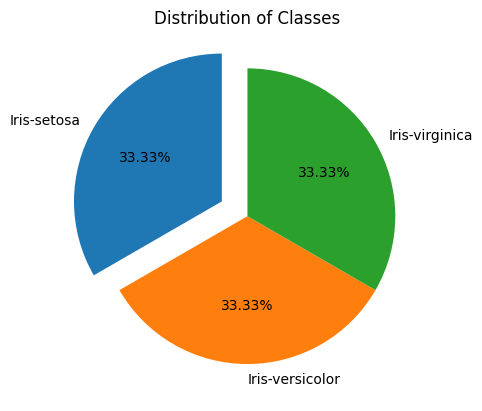

In [115]:
plt.pie(countlist,labels=labellist,autopct="%.2f%%",startangle = 90,explode = (0.2, 0.0, 0.0))
plt.title('Distribution of Classes')
plt.show()

In [116]:
plt.figure(figsize=(15,10))

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

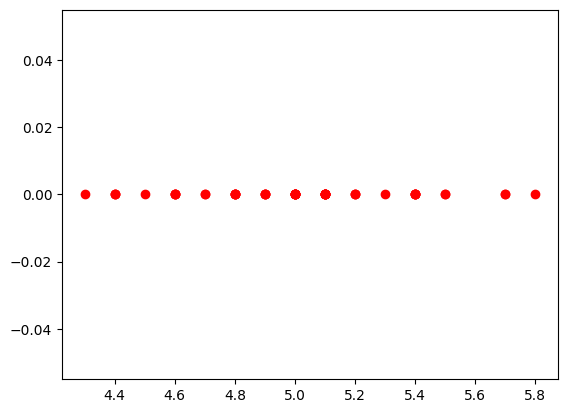

In [117]:
plt.plot((data[data['Species'] == 'Iris-setosa'])['SepalLengthCm'], np.zeros_like((data[data['Species'] == 'Iris-setosa'])['SepalLengthCm']), 'ro')

plt.show()

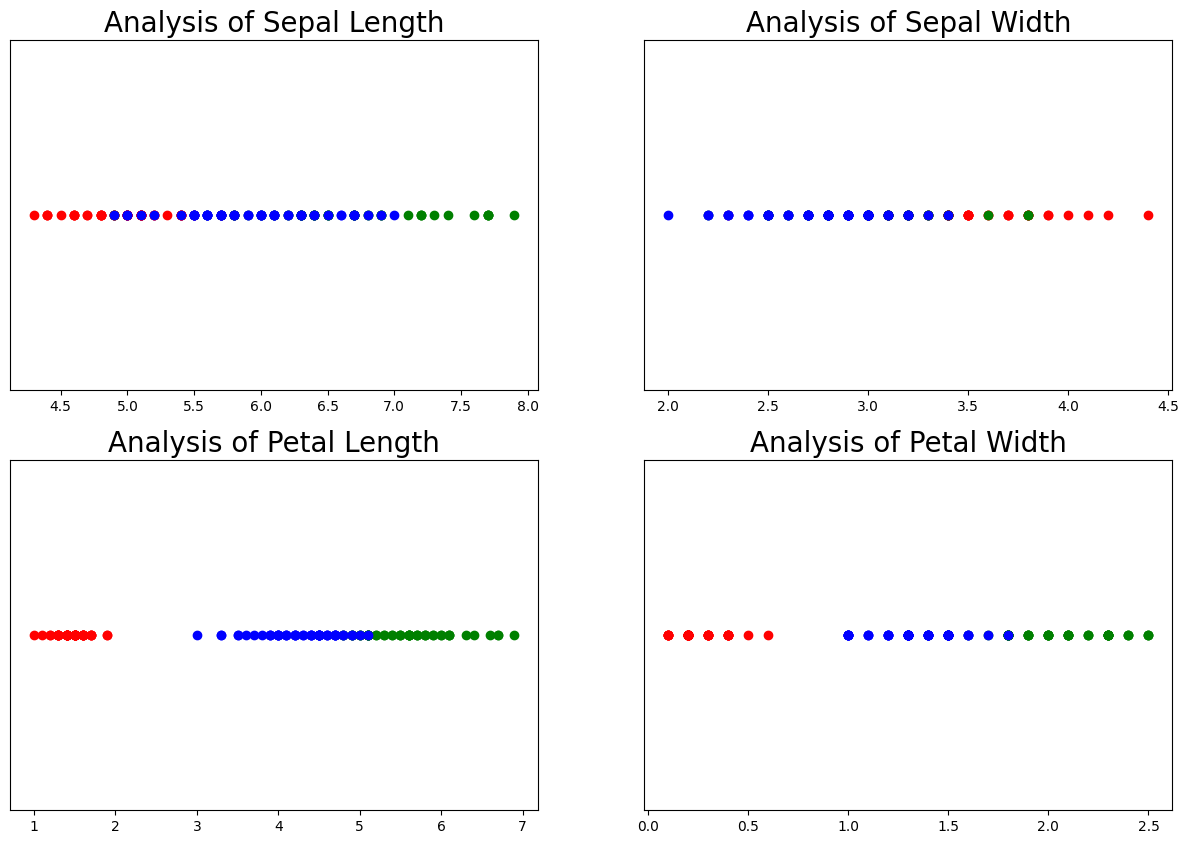

In [118]:
fig=plt.figure(figsize=(15,10))

ax1=fig.add_subplot(2,2,1)
ax2=fig.add_subplot(2,2,2)
ax3=fig.add_subplot(2,2,3)
ax4=fig.add_subplot(2,2,4)


ax1.plot((data[data['Species'] == 'Iris-setosa'])['SepalLengthCm'], np.zeros_like((data[data['Species'] == 'Iris-setosa'])['SepalLengthCm']), 'ro')
ax1.plot((data[data['Species'] == 'Iris-virginica'])['SepalLengthCm'], np.zeros_like((data[data['Species'] == 'Iris-virginica'])['SepalLengthCm']), 'go')
ax1.plot((data[data['Species'] == 'Iris-versicolor'])['SepalLengthCm'], np.zeros_like((data[data['Species'] == 'Iris-versicolor'])['SepalLengthCm']), 'bo')
ax1.set_title('Analysis of Sepal Length', size = 20)
ax1.get_yaxis().set_visible(False)

ax2.plot((data[data['Species'] == 'Iris-setosa'])['SepalWidthCm'], np.zeros_like((data[data['Species'] == 'Iris-setosa'])['SepalWidthCm']), 'ro')
ax2.plot((data[data['Species'] == 'Iris-virginica'])['SepalWidthCm'], np.zeros_like((data[data['Species'] == 'Iris-virginica'])['SepalWidthCm']), 'go')
ax2.plot((data[data['Species'] == 'Iris-versicolor'])['SepalWidthCm'], np.zeros_like((data[data['Species'] == 'Iris-versicolor'])['SepalWidthCm']), 'bo')
ax2.set_title('Analysis of Sepal Width', size = 20)
ax2.get_yaxis().set_visible(False)

ax3.plot((data[data['Species'] == 'Iris-setosa'])['PetalLengthCm'], np.zeros_like((data[data['Species'] == 'Iris-setosa'])['PetalLengthCm']), 'ro')
ax3.plot((data[data['Species'] == 'Iris-virginica'])['PetalLengthCm'], np.zeros_like((data[data['Species'] == 'Iris-virginica'])['PetalLengthCm']), 'go')
ax3.plot((data[data['Species'] == 'Iris-versicolor'])['PetalLengthCm'], np.zeros_like((data[data['Species'] == 'Iris-versicolor'])['PetalLengthCm']), 'bo')
ax3.set_title('Analysis of Petal Length', size = 20)
ax3.get_yaxis().set_visible(False)

ax4.plot((data[data['Species'] == 'Iris-setosa'])['PetalWidthCm'], np.zeros_like((data[data['Species'] == 'Iris-setosa'])['PetalWidthCm']), 'ro')
ax4.plot((data[data['Species'] == 'Iris-virginica'])['PetalWidthCm'], np.zeros_like((data[data['Species'] == 'Iris-virginica'])['PetalWidthCm']), 'go')
ax4.plot((data[data['Species'] == 'Iris-versicolor'])['PetalWidthCm'], np.zeros_like((data[data['Species'] == 'Iris-versicolor'])['PetalWidthCm']), 'bo')
ax4.set_title('Analysis of Petal Width', size = 20)
ax4.get_yaxis().set_visible(False)


plt.show()

In [119]:
###Observations from above???

<Axes: xlabel='Species', ylabel='SepalLengthCm'>

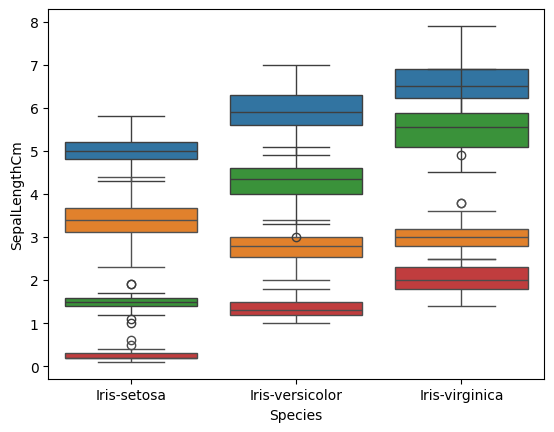

In [120]:
sns.boxplot(data = data, x = 'Species', y = 'SepalLengthCm')
sns.boxplot(data = data, x = 'Species', y = 'SepalWidthCm')
sns.boxplot(data = data, x = 'Species', y = 'PetalLengthCm')
sns.boxplot(data = data, x = 'Species', y = 'PetalWidthCm')

<Axes: xlabel='Species', ylabel='SepalLengthCm'>

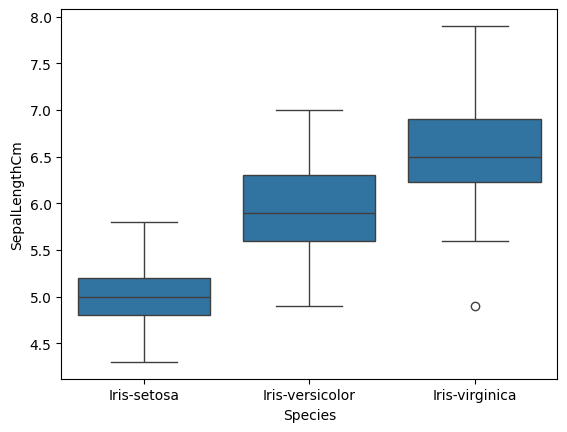

In [121]:
sns.boxplot(data = data, x = 'Species', y = 'SepalLengthCm')

<Axes: xlabel='Species', ylabel='PetalLengthCm'>

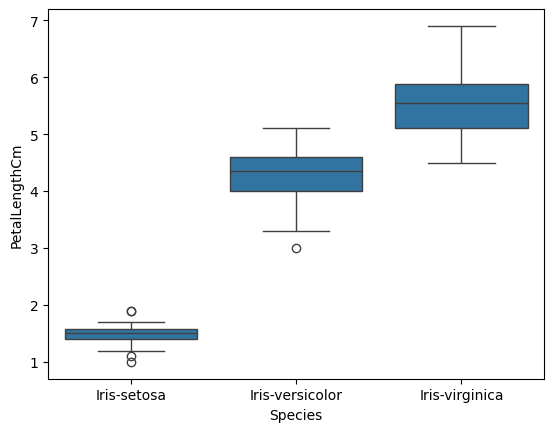

In [122]:
sns.boxplot(data = data, x = 'Species', y = 'PetalLengthCm')

<Axes: xlabel='Species', ylabel='SepalLengthCm'>

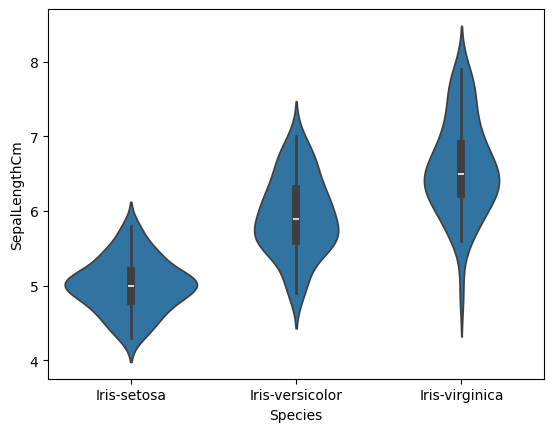

In [123]:
sns.violinplot(data = data, x = 'Species', y = 'SepalLengthCm')

<Axes: xlabel='Species', ylabel='PetalLengthCm'>

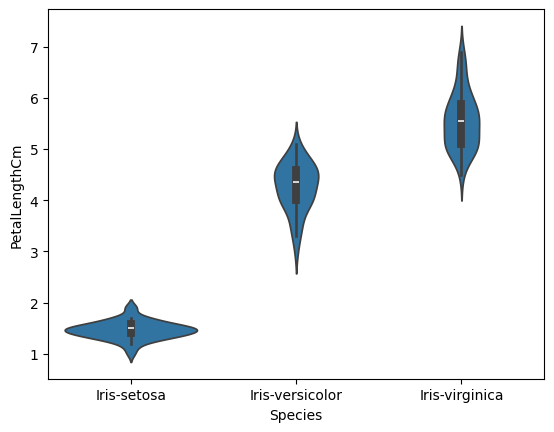

In [124]:
sns.violinplot(data = data, x = 'Species', y = 'PetalLengthCm')

In [125]:
# Bivariate Analysis

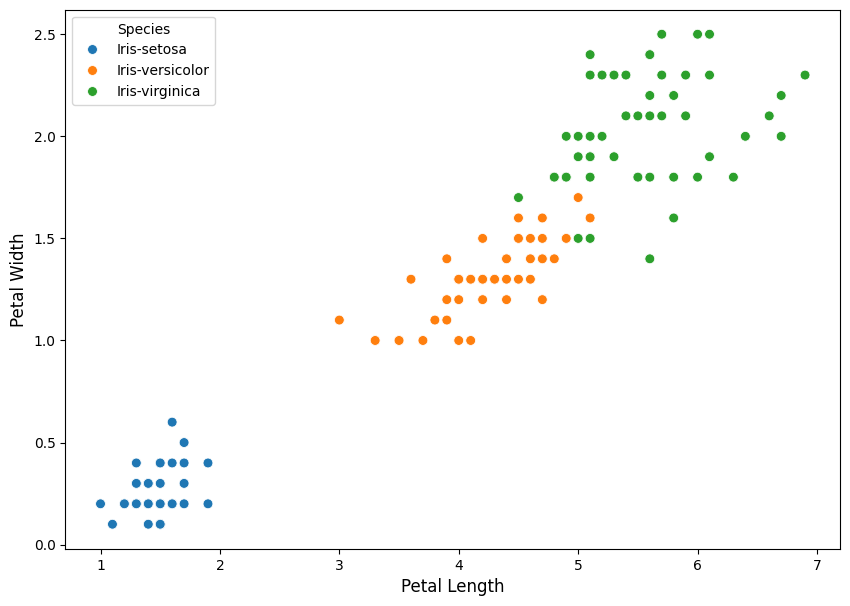

In [126]:
plt.figure(figsize = (10, 7))
sns.scatterplot(x = 'PetalLengthCm', y = 'PetalWidthCm', hue = 'Species', data = data, s = 50)
plt.xlabel('Petal Length', fontsize = 12)
plt.ylabel('Petal Width', fontsize = 12)
plt.show()

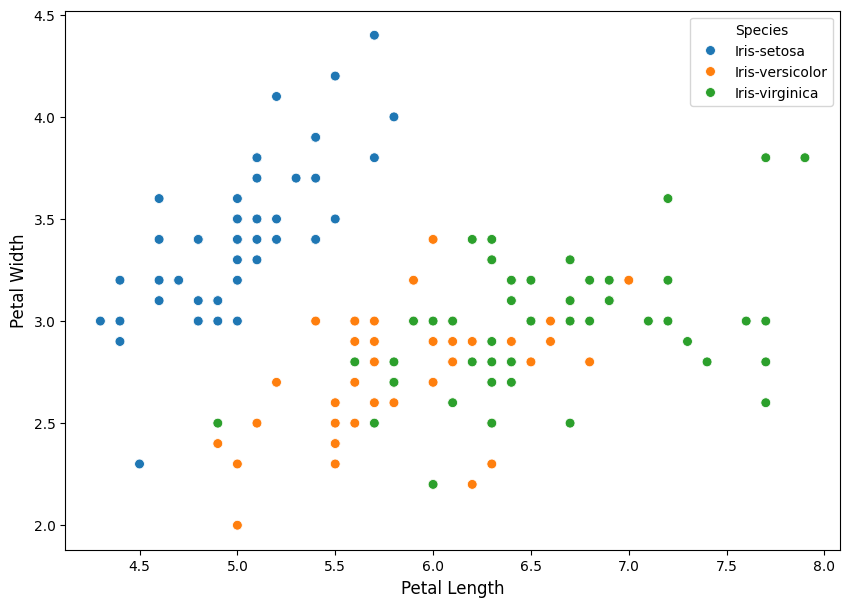

In [127]:
plt.figure(figsize = (10, 7))
sns.scatterplot(x = 'SepalLengthCm', y = 'SepalWidthCm', hue = 'Species', data = data, s = 50)
plt.xlabel('Petal Length', fontsize = 12)
plt.ylabel('Petal Width', fontsize = 12)
plt.show()

In [128]:
# Multivariate Analysis

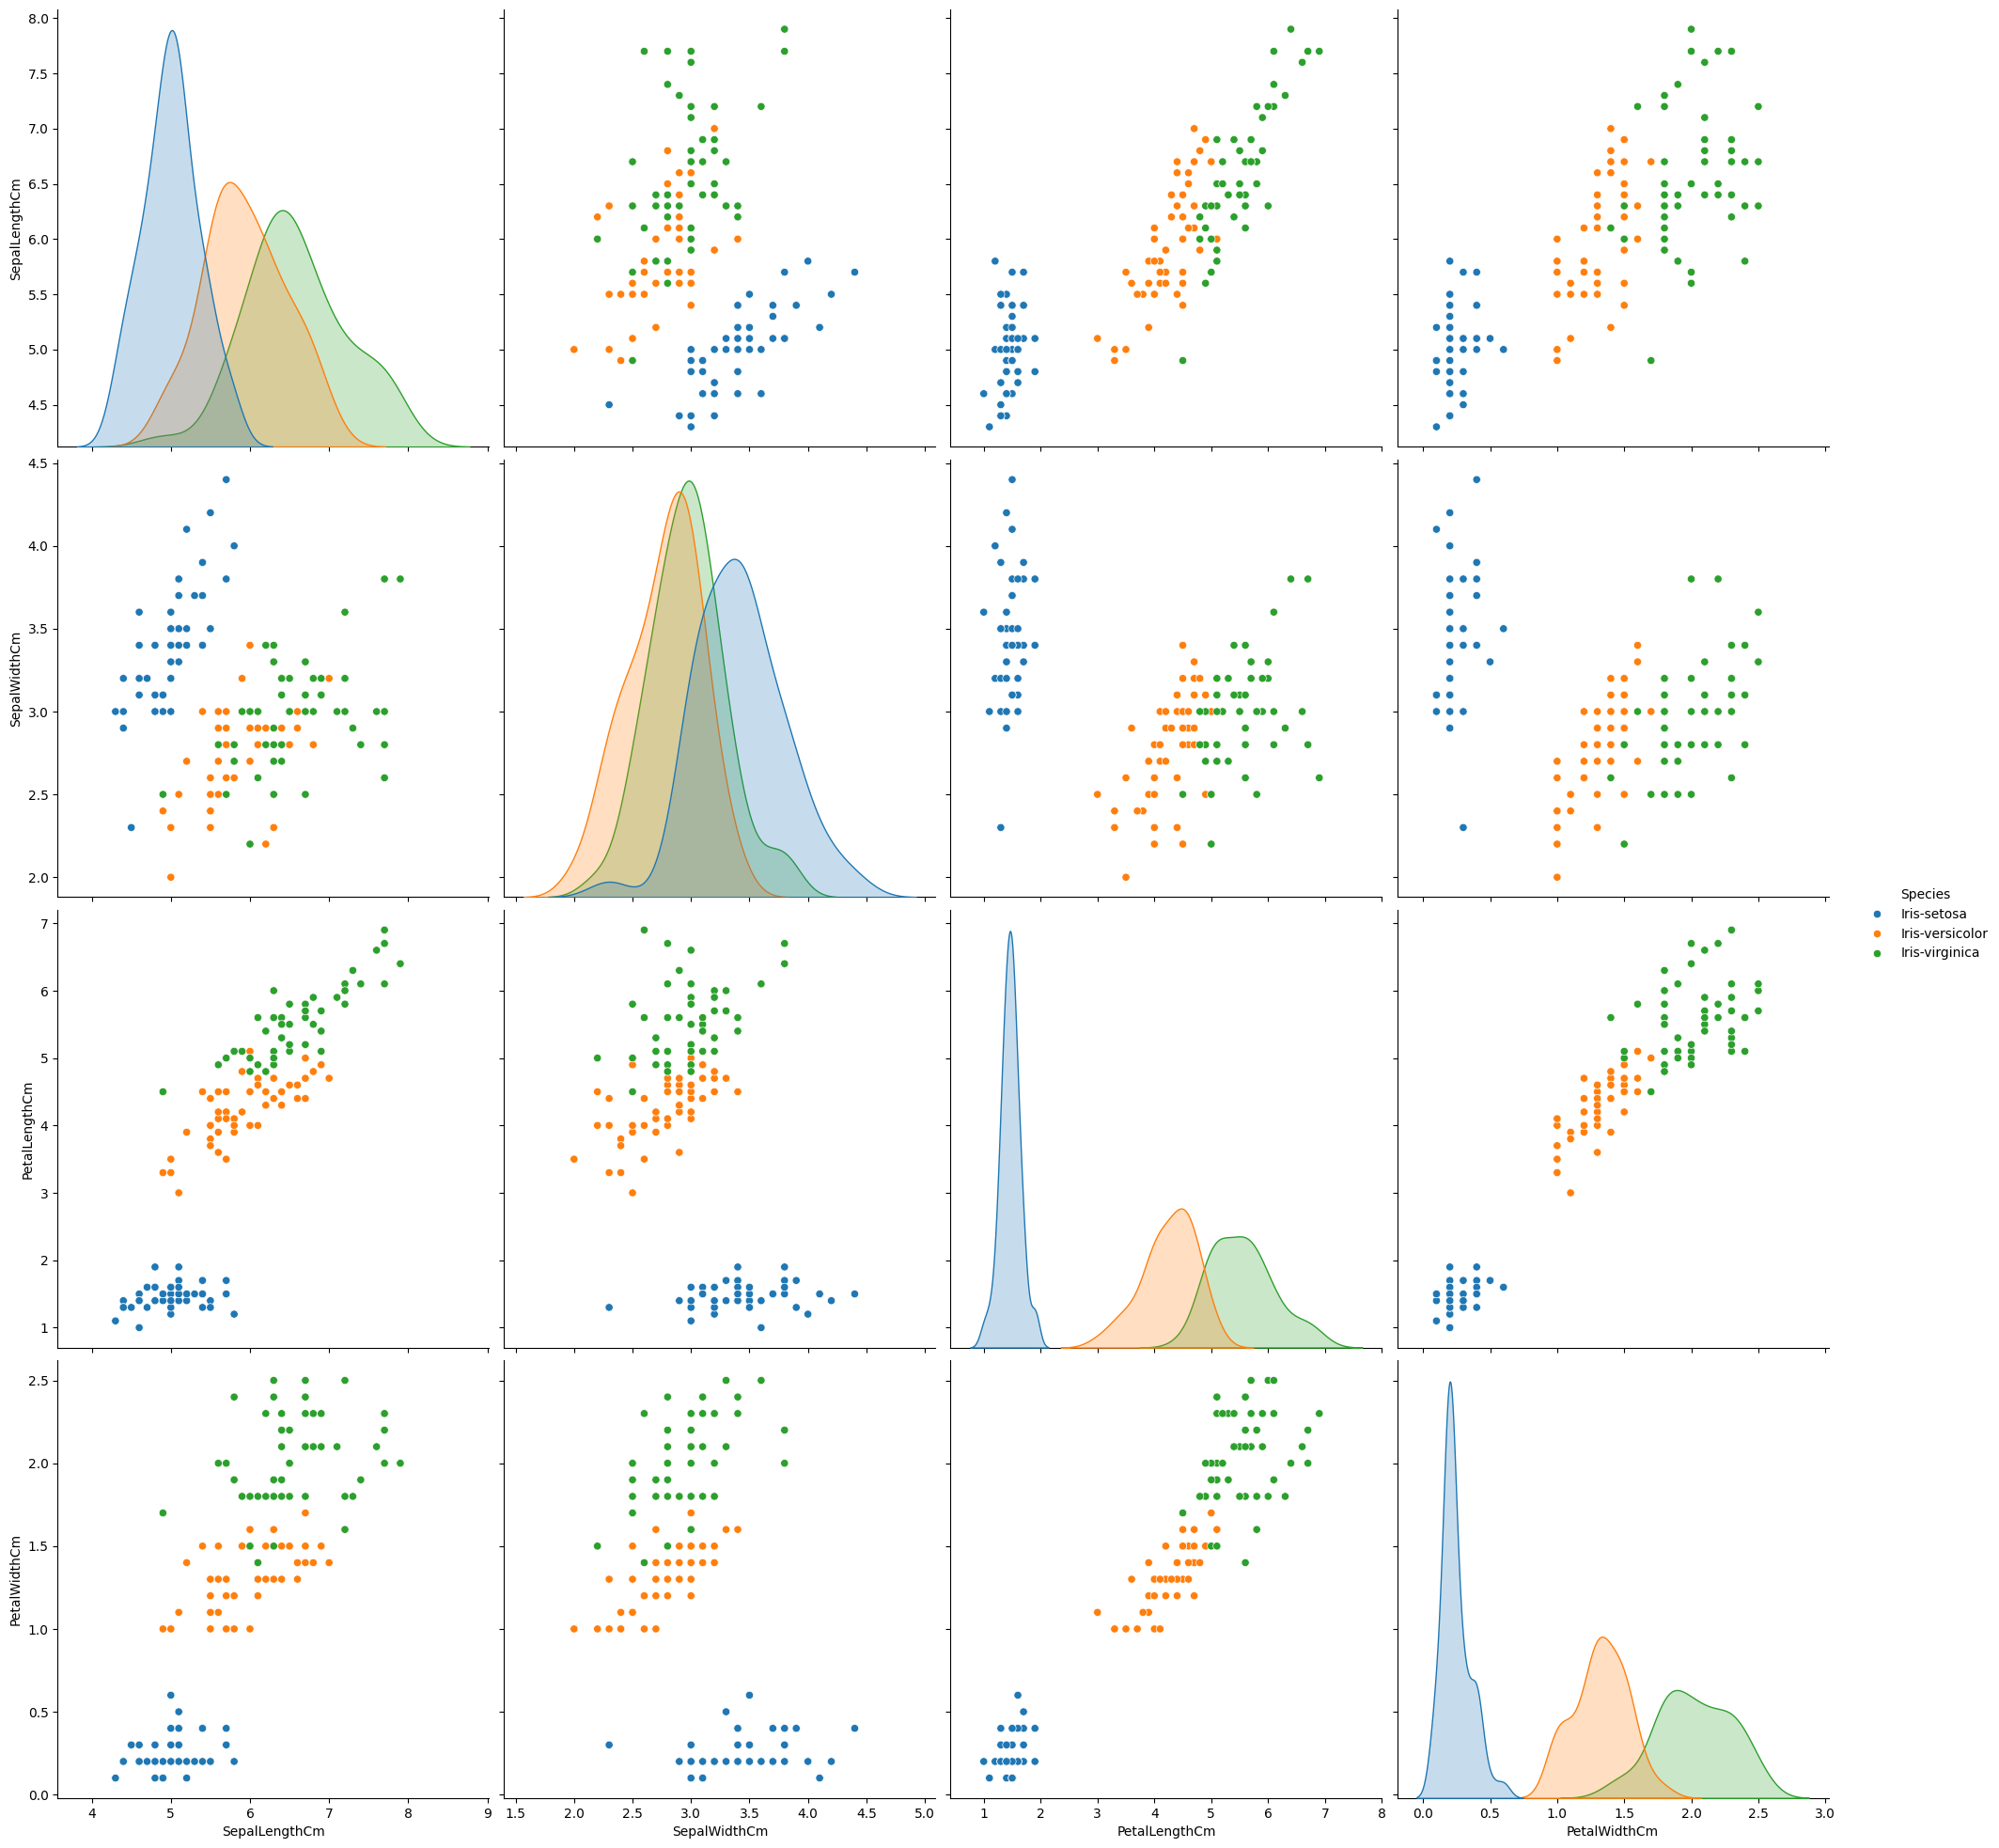

In [129]:
sns.pairplot(data, hue = 'Species', height = 5)
plt.show()

In [130]:
# Correlations

               SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
SepalLengthCm       1.000000     -0.109369       0.871754      0.817954
SepalWidthCm       -0.109369      1.000000      -0.420516     -0.356544
PetalLengthCm       0.871754     -0.420516       1.000000      0.962757
PetalWidthCm        0.817954     -0.356544       0.962757      1.000000


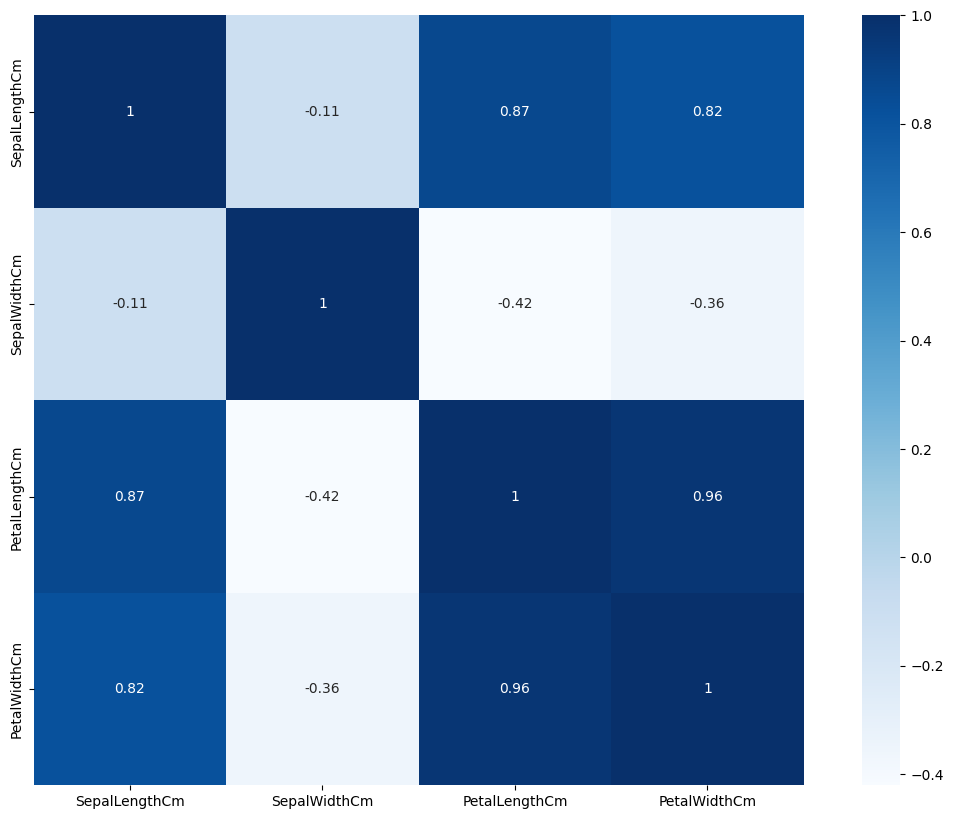

In [131]:
# Select only numerical columns for correlation calculation
numerical_data = data.select_dtypes(include=np.number)

# Calculate and display the correlation matrix
correlation_matrix = numerical_data.corr()
print(correlation_matrix)

plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, cmap='Blues', square=True, annot=True)
plt.show()

#Linear Regression

In [132]:
def linear_regression_iris():
    # Load Iris dataset
    iris = load_iris()
    data = pd.DataFrame(data=iris.data, columns=iris.feature_names)

    # Select 'petal length' as feature and 'petal width' as target
    X = data['petal length (cm)'].values.reshape(-1, 1)
    y = data['petal width (cm)'].values

    # Split dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Create and train Linear Regression model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Predict on test set
    y_pred = model.predict(X_test)

    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    print("Linear Regression Results:")
    print(f"Mean Squared Error: {mse:.3f}")
    print(f"Model Coefficient: {model.coef_[0]:.3f}")
    print(f"Model Intercept: {model.intercept_:.3f}")

    return model

# Run Linear Regression
linear_regression_iris()


Linear Regression Results:
Mean Squared Error: 0.046
Model Coefficient: 0.413
Model Intercept: -0.357


LinearRegression()

#Classification

In [133]:
def classification_iris():
    # Load Iris dataset
    iris = load_iris()
    X = iris.data  # Features: all columns
    y = iris.target  # Target: species

    # Split dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Create and train Logistic Regression model
    model = LogisticRegression(max_iter=200)
    model.fit(X_train, y_train)

    # Predict on test set
    y_pred = model.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    print("\nClassification Results:")
    print(f"Accuracy: {accuracy:.3f}")

    return model

# Run Classification
classification_iris()



Classification Results:
Accuracy: 1.000


LogisticRegression(max_iter=200)

In [134]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Load the iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the SVM model with a linear kernel
svm_model = SVC(kernel='linear')

# Train the model
svm_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:')
print(classification_report(y_test, y_pred))

Accuracy: 1.00
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

